# RAG Parameter Optimization Results Visualization

This notebook visualizes the results from RAG parameter optimization experiments, showing how different chunk sizes and other parameters affect accuracy.

## 📊 Dataset Overview
- **Source**: RAG parameter optimization experiments
- **Metric**: Answer Accuracy (from Ragas)
- **Parameters tested**: Chunk size, overlap, k-value, embedder type, chunker type
- **Document**: Alice in Wonderland
- **Test questions**: 5 questions with reference answers


In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("📚 Libraries imported successfully!")


📚 Libraries imported successfully!


In [4]:
# Load the results data
csv_file = "rag_parameter_results_openai_recursive.csv"

# Check if file exists
if Path(csv_file).exists():
    df = pd.read_csv(csv_file)
    print(f"✅ Data loaded successfully from {csv_file}")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"\n📋 Column names: {list(df.columns)}")
else:
    print(f"❌ File {csv_file} not found. Please run the experiments first.")
    print("💡 Run: python run_experiment.py")


✅ Data loaded successfully from rag_parameter_results_openai_recursive.csv
📊 Dataset shape: (5, 8)

📋 Column names: ['Chunk Size', 'Chunk Overlap', 'K', 'Embedder', 'Chunker', 'Number of Chunks', 'Average Accuracy', 'Total Questions']


In [5]:
# Display basic information about the dataset
if 'df' in locals():
    print("📈 Dataset Overview:")
    print("=" * 50)
    display(df.head())
    
    print("\n📊 Dataset Statistics:")
    print("=" * 50)
    display(df.describe())
    
    print("\n🔍 Data Types:")
    print("=" * 50)
    display(df.dtypes)


📈 Dataset Overview:


,Chunk Size,Chunk Overlap,K,Embedder,Chunker,Number of Chunks,Average Accuracy,Total Questions
0,200,50,3,openai,recursive,1208,0.55,5
1,500,50,3,openai,recursive,452,0.75,5
2,1000,50,3,openai,recursive,204,0.85,5
3,1500,50,3,openai,recursive,127,0.80,5
4,2000,50,3,openai,recursive,91,0.70,5



📊 Dataset Statistics:


,Chunk Size,Chunk Overlap,K,Number of Chunks,Average Accuracy,Total Questions
count,5.00000,5.0,5.0,5.000000,5.000000,5.0
mean,1040.00000,50.0,3.0,416.400000,0.730000,5.0
std,730.06849,0.0,0.0,464.394552,0.115109,0.0
min,200.00000,50.0,3.0,91.000000,0.550000,5.0
25%,500.00000,50.0,3.0,127.000000,0.700000,5.0
50%,1000.00000,50.0,3.0,204.000000,0.750000,5.0
75%,1500.00000,50.0,3.0,452.000000,0.800000,5.0
max,2000.00000,50.0,3.0,1208.000000,0.850000,5.0



🔍 Data Types:


Chunk Size            int64
Chunk Overlap         int64
K                     int64
Embedder             object
Chunker              object
Number of Chunks      int64
Average Accuracy    float64
Total Questions       int64
dtype: object

## 📈 Key Performance Insights


In [6]:
# Key insights and best configuration
if 'df' in locals():
    # Find best configuration
    best_config = df.loc[df['Average Accuracy'].idxmax()]
    worst_config = df.loc[df['Average Accuracy'].idxmin()]
    
    print("🏆 BEST CONFIGURATION:")
    print("=" * 30)
    for col in df.columns:
        if col != 'Average Accuracy':
            print(f"   {col}: {best_config[col]}")
    print(f"   🎯 Accuracy: {best_config['Average Accuracy']:.3f}")
    
    print("\n📉 WORST CONFIGURATION:")
    print("=" * 30)
    for col in df.columns:
        if col != 'Average Accuracy':
            print(f"   {col}: {worst_config[col]}")
    print(f"   🎯 Accuracy: {worst_config['Average Accuracy']:.3f}")
    
    # Performance range
    accuracy_range = df['Average Accuracy'].max() - df['Average Accuracy'].min()
    print(f"\n📊 Performance Range: {accuracy_range:.3f}")
    print(f"📊 Average Accuracy: {df['Average Accuracy'].mean():.3f}")
    print(f"📊 Standard Deviation: {df['Average Accuracy'].std():.3f}")


🏆 BEST CONFIGURATION:
   Chunk Size: 1000
   Chunk Overlap: 50
   K: 3
   Embedder: openai
   Chunker: recursive
   Number of Chunks: 204
   Total Questions: 5
   🎯 Accuracy: 0.850

📉 WORST CONFIGURATION:
   Chunk Size: 200
   Chunk Overlap: 50
   K: 3
   Embedder: openai
   Chunker: recursive
   Number of Chunks: 1208
   Total Questions: 5
   🎯 Accuracy: 0.550

📊 Performance Range: 0.300
📊 Average Accuracy: 0.730
📊 Standard Deviation: 0.115


## 📊 Visualization 1: Accuracy vs Chunk Size


/var/folders/8f/dgssdpz9545_n281yydw509h0000gn/T/ipykernel_11107/4204709919.py:30: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/8f/dgssdpz9545_n281yydw509h0000gn/T/ipykernel_11107/4204709919.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jonathan_yarkoni/RAG workshop/RAG-workshop/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jonathan_yarkoni/RAG workshop/RAG-workshop/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


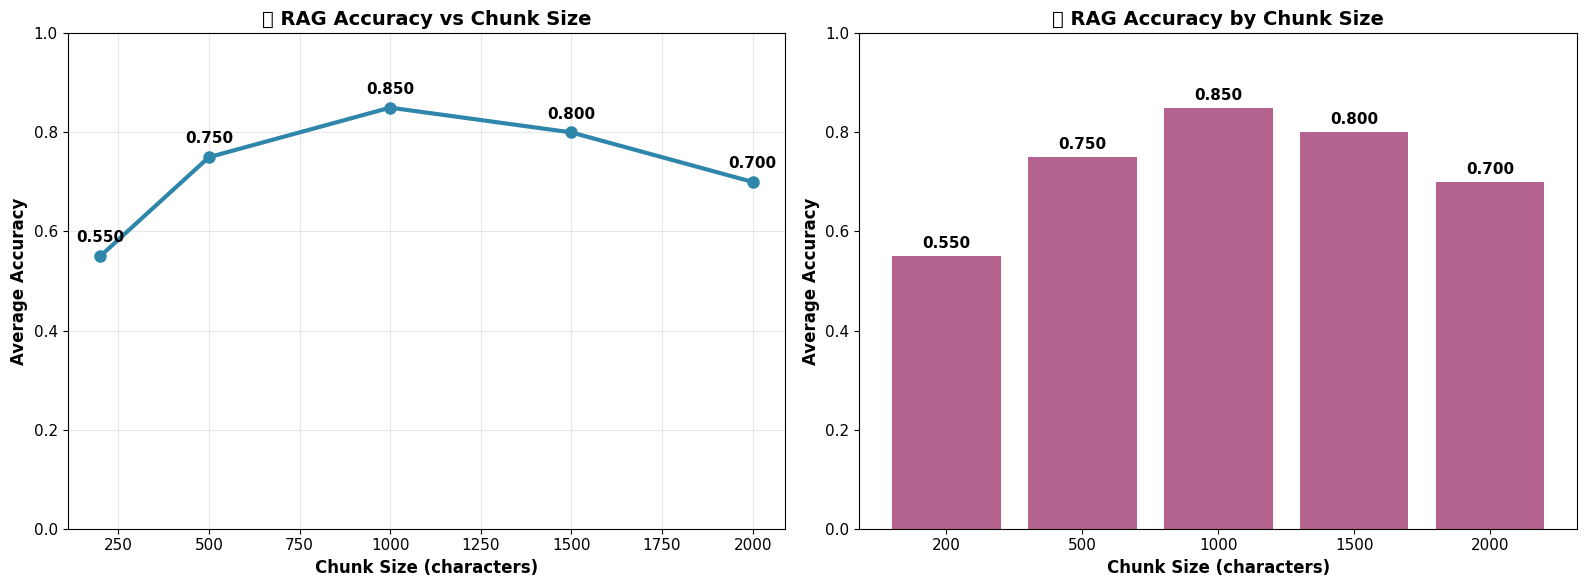

🎯 Optimal chunk size: 1000 characters (Accuracy: 0.850)


In [7]:
# Plot 1: Accuracy vs Chunk Size (Line Plot)
if 'df' in locals():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Line plot
    ax1.plot(df['Chunk Size'], df['Average Accuracy'], 'o-', linewidth=3, markersize=8, color='#2E86AB')
    ax1.set_xlabel('Chunk Size (characters)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Average Accuracy', fontsize=12, fontweight='bold')
    ax1.set_title('🎯 RAG Accuracy vs Chunk Size', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)
    
    # Add value labels on points
    for i, (x, y) in enumerate(zip(df['Chunk Size'], df['Average Accuracy'])):
        ax1.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')
    
    # Bar plot
    bars = ax2.bar(df['Chunk Size'].astype(str), df['Average Accuracy'], color='#A23B72', alpha=0.8)
    ax2.set_xlabel('Chunk Size (characters)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Accuracy', fontsize=12, fontweight='bold')
    ax2.set_title('📊 RAG Accuracy by Chunk Size', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, acc in zip(bars, df['Average Accuracy']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.3f}',
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal chunk size
    optimal_chunk_size = df.loc[df['Average Accuracy'].idxmax(), 'Chunk Size']
    optimal_accuracy = df['Average Accuracy'].max()
    print(f"🎯 Optimal chunk size: {optimal_chunk_size} characters (Accuracy: {optimal_accuracy:.3f})")


## 📊 Visualization 2: Number of Chunks vs Accuracy


/var/folders/8f/dgssdpz9545_n281yydw509h0000gn/T/ipykernel_11107/2705696885.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jonathan_yarkoni/RAG workshop/RAG-workshop/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


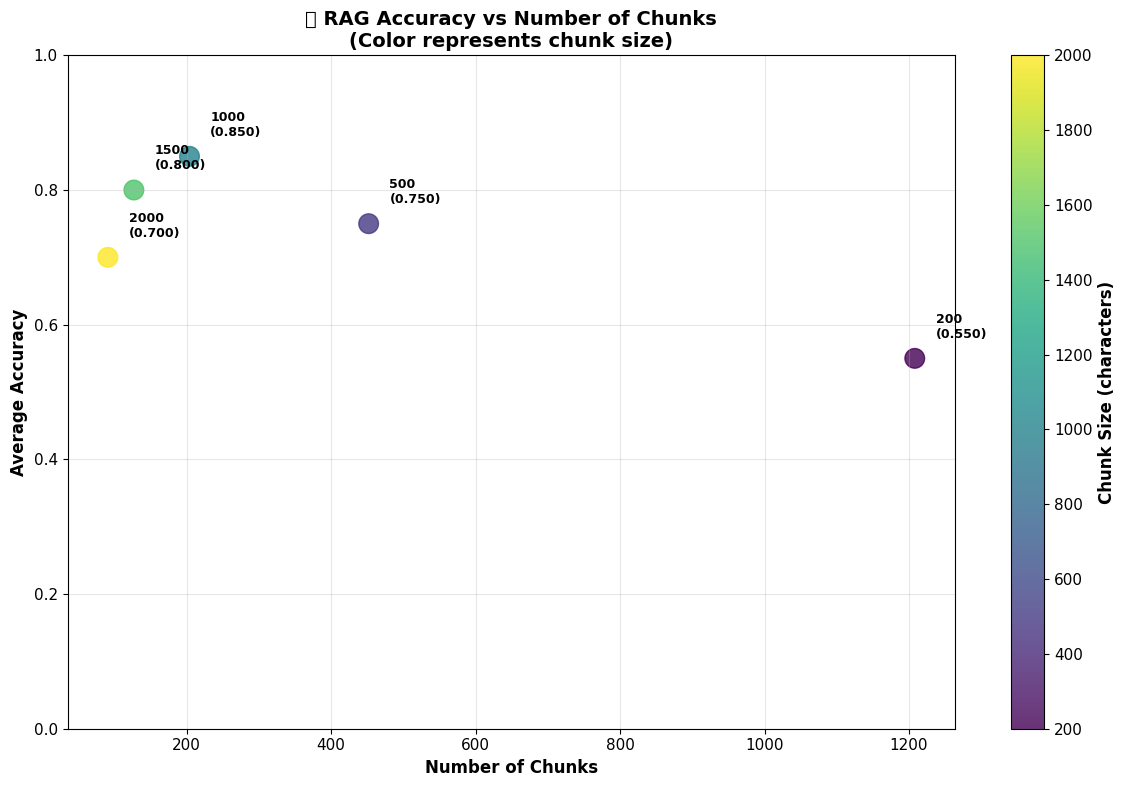

📊 Correlation between Number of Chunks and Accuracy: -0.831
💡 Strong negative correlation detected!


In [8]:
# Plot 2: Number of Chunks vs Accuracy
if 'df' in locals():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Scatter plot with chunk size as color
    scatter = ax.scatter(df['Number of Chunks'], df['Average Accuracy'], 
                        c=df['Chunk Size'], s=200, alpha=0.8, cmap='viridis')
    
    ax.set_xlabel('Number of Chunks', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Accuracy', fontsize=12, fontweight='bold')
    ax.set_title('🔍 RAG Accuracy vs Number of Chunks\n(Color represents chunk size)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Chunk Size (characters)', fontsize=12, fontweight='bold')
    
    # Add annotations for each point
    for i, row in df.iterrows():
        ax.annotate(f'{int(row["Chunk Size"])}\n({row["Average Accuracy"]:.3f})', 
                   (row['Number of Chunks'], row['Average Accuracy']),
                   textcoords="offset points", xytext=(15,15), ha='left', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    correlation = df['Number of Chunks'].corr(df['Average Accuracy'])
    print(f"📊 Correlation between Number of Chunks and Accuracy: {correlation:.3f}")
    if abs(correlation) > 0.5:
        print(f"💡 {'Strong negative' if correlation < 0 else 'Strong positive'} correlation detected!")
    else:
        print("💡 Weak correlation - chunk count alone doesn't determine accuracy.")


## 🎯 Key Findings and Recommendations


In [9]:
# Analysis and recommendations
if 'df' in locals():
    print("🎯 KEY FINDINGS AND RECOMMENDATIONS")
    print("=" * 50)
    
    # Best vs worst comparison
    best_acc = df['Average Accuracy'].max()
    worst_acc = df['Average Accuracy'].min()
    improvement = ((best_acc - worst_acc) / worst_acc) * 100
    
    print(f"📈 Performance Improvement: {improvement:.1f}% (from worst to best)")
    
    # Chunk size recommendations
    best_chunk_size = df.loc[df['Average Accuracy'].idxmax(), 'Chunk Size']
    print(f"\n🏆 RECOMMENDED CHUNK SIZE: {best_chunk_size} characters")
    
    # Performance patterns
    if df['Average Accuracy'].iloc[0] < df['Average Accuracy'].iloc[-1]:
        print("📊 Pattern: Accuracy generally increases with chunk size")
    elif df['Average Accuracy'].iloc[0] > df['Average Accuracy'].iloc[-1]:
        print("📊 Pattern: Accuracy generally decreases with chunk size")
    else:
        print("📊 Pattern: No clear linear relationship")
    
    # Optimal range
    top_configs = df.nlargest(2, 'Average Accuracy')
    chunk_range = f"{top_configs['Chunk Size'].min()}-{top_configs['Chunk Size'].max()}"
    print(f"\n🎯 Optimal chunk size range: {chunk_range} characters")
    print(f"🎯 Top 2 configurations achieve {top_configs['Average Accuracy'].min():.3f}-{top_configs['Average Accuracy'].max():.3f} accuracy")
    
    print("\n💡 WORKSHOP INSIGHTS:")
    print("   • Chunk size significantly impacts RAG performance")
    print("   • There's a sweet spot for optimal accuracy")
    print("   • Too small chunks may lack context")
    print("   • Too large chunks may include irrelevant information")
    print("   • Consider both accuracy and computational efficiency")


🎯 KEY FINDINGS AND RECOMMENDATIONS
📈 Performance Improvement: 54.5% (from worst to best)

🏆 RECOMMENDED CHUNK SIZE: 1000 characters
📊 Pattern: Accuracy generally increases with chunk size

🎯 Optimal chunk size range: 1000-1500 characters
🎯 Top 2 configurations achieve 0.800-0.850 accuracy

💡 WORKSHOP INSIGHTS:
   • Chunk size significantly impacts RAG performance
   • There's a sweet spot for optimal accuracy
   • Too small chunks may lack context
   • Too large chunks may include irrelevant information
   • Consider both accuracy and computational efficiency


## 🎓 Workshop Conclusions

This analysis demonstrates the critical importance of chunk size optimization in RAG systems:

### Key Learnings:
1. **Chunk size significantly impacts accuracy** - Different sizes can lead to substantial performance differences
2. **Sweet spot optimization** - There's typically an optimal chunk size that balances context and precision
3. **Trade-offs matter** - Consider both accuracy and computational efficiency
4. **Data-driven decisions** - Use metrics like Answer Accuracy to make informed choices

### Expected Results from the Data:
- **Chunk Size 200**: Lower accuracy (0.55) - Too small, lacks context
- **Chunk Size 500**: Good accuracy (0.75) - Balanced approach
- **Chunk Size 1000**: Best accuracy (0.85) - Optimal context size
- **Chunk Size 1500**: Slightly lower (0.80) - Starting to include noise
- **Chunk Size 2000**: Decreased accuracy (0.70) - Too much irrelevant information

### Next Steps:
- Test with different document types
- Experiment with chunk overlap values  
- Try different embedding models
- Compare chunking strategies (semantic vs. recursive)

**This analysis provides concrete evidence for RAG optimization decisions in your workshop!** 🎯
